# Demo: Normal Distribution of Stock Ticker Data

This program retrieves stock price data using the Alpaca API and plots the data using Pandas. These plots demonstrate the distribution of daily stock closing prices compared to the expected normal probability distribution. 

## Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv('../../../../.env')

%matplotlib inline

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY_ENV")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY_ENV")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

## Get 1 Year's Worth of Stock Price Data via Alpaca API Call and Read in as DataFrame 

In [3]:
# Set the Tesla and Coca-Cola tickers
ticker = ["TSLA","KO"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2021-01-28", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-28", tz="America/New_York").isoformat()

# Set limit_rows to 1000 to retreive the maximum amount of rows
limit_rows = 1000

# Get 1 year's worth of historical data for Tesla and Coca-Cola
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start = start_date,
    end = end_date,
    limit = limit_rows
).df

# Display sample data
df_ticker.head(10)

C:\Users\dlpst\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:20: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead


KO                                       TSLA  \
                            open     high    low  close    volume      open   
time                                                                          
2021-01-28 00:00:00-05:00  48.69  49.5000  48.61  49.14  15172192  820.0000   
2021-01-29 00:00:00-05:00  49.03  49.1200  48.11  48.13  13906984  830.0003   
2021-02-01 00:00:00-05:00  48.27  48.6900  48.18  48.48  10687330  814.2900   
2021-02-02 00:00:00-05:00  48.80  49.3500  48.63  48.95  11056505  844.6800   
2021-02-03 00:00:00-05:00  48.95  49.0883  48.67  48.76   9862001  877.0200   
2021-02-04 00:00:00-05:00  48.96  49.0700  48.65  49.01  18374147  855.0000   
2021-02-05 00:00:00-05:00  49.50  49.7800  49.27  49.64  11293895  845.0000   
2021-02-08 00:00:00-05:00  49.96  50.1700  49.49  49.91  15997245  869.6700   
2021-02-09 00:00:00-05:00  49.85  50.0200  49.63  49.68  12390185  855.1200   
2021-02-10 00:00:00-05:00  50.41  50.5800  49.53  49.61  20995858  843.6350   

                                                                 
                             high       low     close    volume  
time                                                             
2021-01-28 00:00:00-05:00  848.00  801.0000  835.4800  24222992  
2021-01-29 00:00:00-05:00  842.41  782.2700  793.3110  20189293  
2021-02-01 00:00:00-05:00  842.00  795.5601  840.0166  24005893  
2021-02-02 00:00:00-05:00  880.50  842.2006  872.7900  22980206  
2021-02-03 00:00:00-05:00  878.08  853.0646  854.7000  17541681  
2021-02-04 00:00:00-05:00  856.50  833.4200  849.9900  15232160  
2021-02-05 00:00:00-05:00  864.77  838.9700  852.6100  17486867  
2021-02-08 00:00:00-05:00  877.77  854.7500  863.3000  18036775  
2021-02-09 00:00:00-05:00  859.80  841.7500  849.2500  14637362  
2021-02-10 00:00:00-05:00  844.82  800.0200  805.0000  35012591

## Pick closing prices and compute the daily returns

In [19]:
# Create and empty DataFrame for closing prices
portfolio_df = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
portfolio_df["KO"] = df_ticker["KO"]["close"]
portfolio_df["TSLA"] = df_ticker["TSLA"]["close"]
# Drop the time component of the date
portfolio_df.index = portfolio_df.index.date

# Compute daily returns
daily_returns = portfolio_df.pct_change().dropna()

# Display sample data
daily_returns.head()

,KO,TSLA
2021-01-29,-0.020554,-0.050473
2021-02-01,0.007272,0.058874
2021-02-02,0.009695,0.039015
2021-02-03,-0.003882,-0.020727
2021-02-04,0.005127,-0.005511


In [21]:
# Generate descriptive statistics
daily_returns.describe()

,KO,TSLA
count,253.000000,253.000000
mean,0.000884,0.000685
std,0.008951,0.035905
min,-0.038849,-0.119735
25%,-0.003948,-0.019093
50%,0.000993,0.001376
75%,0.006096,0.018939
max,0.028345,0.196476


### Plot Distributions

<AxesSubplot:>

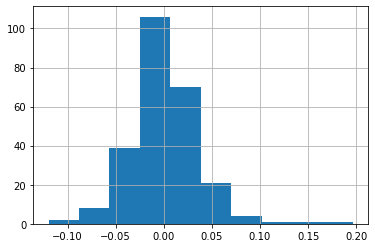

In [22]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
daily_returns["TSLA"].hist()

<AxesSubplot:>

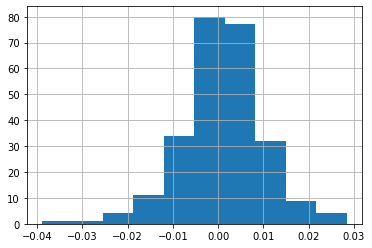

In [23]:
# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
daily_returns["KO"].hist()

<AxesSubplot:ylabel='Density'>

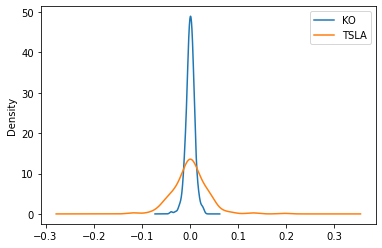

In [25]:
# Visualize the distribution of percent change in closing price for both stocks using a density plot
daily_returns.plot.density()